<a href="https://colab.research.google.com/github/valerio-unifei/ecom01/blob/main/ECOM01-DS02-Atividades_Extra%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset de Estudo

http://archive.ics.uci.edu/ml/datasets/Abalone

<img src="http://upload.wikimedia.org/wikipedia/commons/0/0b/AbaloneInside.jpg">

Previsão da idade do abalone a partir de medições físicas. A idade do abalone é determinada cortando a casca através do cone, manchando-a e contando o número de anéis através de um microscópio - uma tarefa chata e demorada. Outras medidas, mais fáceis de obter, são usadas para prever a idade. Mais informações, como padrões climáticos e localização (daí a disponibilidade de alimentos) podem ser necessárias para resolver o problema.

Dos dados originais, os exemplos com valores ausentes foram removidos (a maioria com o valor previsto ausente) e os intervalos dos valores contínuos foram dimensionados para uso com uma RNA (dividindo por 200).

In [ ]:
import pandas as pd

column_names = ["sex", "length", "diameter", "height", "whole_weight", 
                "shucked_weight", "viscera_weight", "shell_weight", "rings"]

abalone = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', 
    names=column_names)
print("Número de amostras: %d" % len(abalone))
abalone.head()

Número de amostras: 4177


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Convertendo atributo texto (string) para numérico (float)

In [ ]:
abalone['sex'] = pd.factorize(abalone['sex'])[0]
abalone.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Estrator de Conhecimento

In [ ]:
from sklearn import tree

X = abalone[abalone.columns[:-1]].values
y = abalone[abalone.columns[-1]].values

clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)
clf.score(X,y)

0.271247306679435

In [38]:
tree_rules = tree.export_text(clf, feature_names=list(column_names[:-1]),decimals=5)
print(tree_rules)

|--- shell_weight <= 0.14450
|   |--- diameter <= 0.22250
|   |   |--- shell_weight <= 0.02175
|   |   |   |--- class: 4
|   |   |--- shell_weight >  0.02175
|   |   |   |--- class: 5
|   |--- diameter >  0.22250
|   |   |--- sex <= 1.50000
|   |   |   |--- class: 8
|   |   |--- sex >  1.50000
|   |   |   |--- class: 7
|--- shell_weight >  0.14450
|   |--- shell_weight <= 0.25325
|   |   |--- shucked_weight <= 0.43225
|   |   |   |--- class: 8
|   |   |--- shucked_weight >  0.43225
|   |   |   |--- class: 9
|   |--- shell_weight >  0.25325
|   |   |--- shell_weight <= 0.39300
|   |   |   |--- class: 10
|   |   |--- shell_weight >  0.39300
|   |   |   |--- class: 11



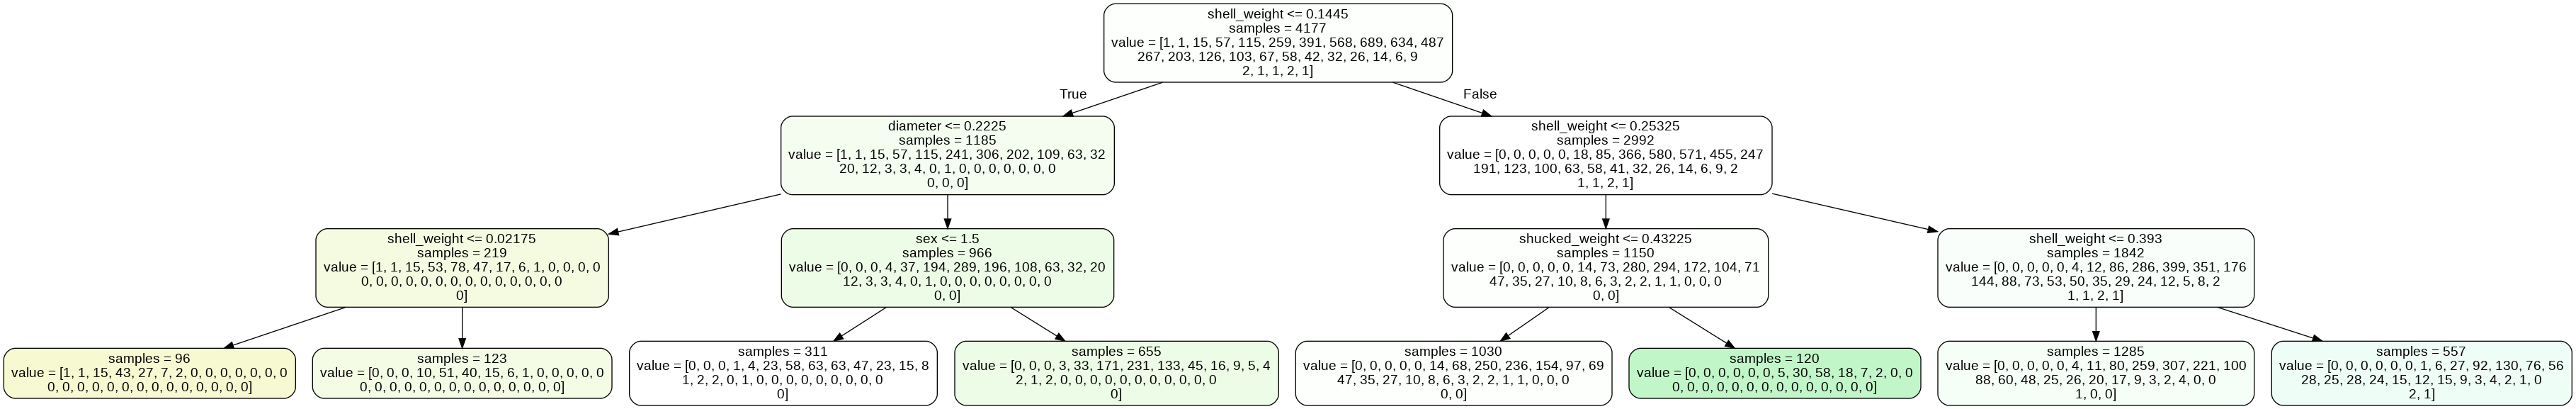

In [ ]:
import graphviz 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=column_names[:-1],
                     filled=True, rounded=True, impurity=False, 
                     special_characters=False, precision=5)  
graph = graphviz.Source(dot_data,format='png')  
graph.render('arvore')
Image(filename='arvore.png')

# Atividades

Converta todas as regras listadas acima em predicados e monte as equações lógicas para filtra o dataset Abalone

In [43]:
'''
|--- shell_weight <= 0.14450
|   |--- diameter <= 0.22250
|   |   |--- shell_weight <= 0.02175
|   |   |   |--- class: 4
'''
p1 = abalone['shell_weight'] <= 0.14450
p2 = abalone['diameter'] <= 0.22250
p3 = abalone['shell_weight'] <= 0.02175

class4 = abalone[p1 & p2 & p3]
print('amostras =', len(class4))
class4.head(10)

amostras = 96


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
42,2,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.0200,5
43,2,0.205,0.150,0.055,0.0420,0.0255,0.0150,0.0120,5
44,2,0.210,0.150,0.050,0.0420,0.0175,0.0125,0.0150,4
148,2,0.175,0.130,0.055,0.0315,0.0105,0.0065,0.0125,5
149,2,0.170,0.130,0.095,0.0300,0.0130,0.0080,0.0100,4
174,2,0.235,0.160,0.040,0.0480,0.0185,0.0180,0.0150,5
178,2,0.225,0.160,0.045,0.0465,0.0250,0.0150,0.0150,4
236,2,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
237,2,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
238,2,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3


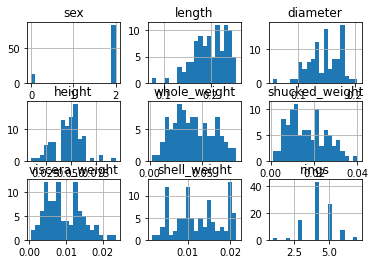

In [44]:
_ = class4.hist(bins=20)

amostras = 123


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
58,2,0.245,0.190,0.060,0.0860,0.0420,0.0140,0.025,4
125,2,0.270,0.195,0.060,0.0730,0.0285,0.0235,0.030,5
134,2,0.265,0.200,0.065,0.0975,0.0400,0.0205,0.028,7
147,2,0.280,0.205,0.080,0.1270,0.0520,0.0390,0.042,9
176,2,0.315,0.210,0.060,0.1250,0.0600,0.0375,0.035,5
233,2,0.275,0.215,0.075,0.1155,0.0485,0.0290,0.035,7
241,2,0.270,0.200,0.070,0.1000,0.0340,0.0245,0.035,5
263,2,0.245,0.195,0.060,0.0950,0.0445,0.0245,0.026,4
264,0,0.270,0.200,0.080,0.1205,0.0465,0.0280,0.040,6
295,2,0.295,0.215,0.085,0.1280,0.0490,0.0340,0.040,6


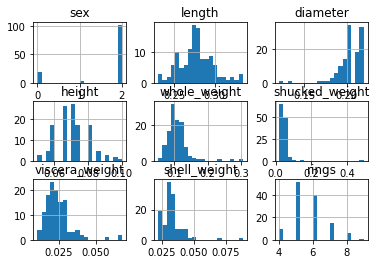

In [42]:
'''
|--- shell_weight <= 0.14450
|   |--- diameter <= 0.22250
|   |   |--- shell_weight >  0.02175
|   |   |   |--- class: 5
'''

p1 = abalone['shell_weight'] <= 0.14450
p2 = abalone['diameter'] <= 0.22250
p3 = abalone['shell_weight'] > 0.02175

class5 = abalone[p1 & p2 & p3]
print('amostras =', len(class5))
display(class5.head(10))
_ = class5.hist(bins=20)